# Описание

Данная тетрадка содержит в себе первое задание по компьютерному практикуму по экономике. Вам предстоит освоить ряд важных библиотек для Python, изучить основы Latex, а также создать экономические модели.

Все задания связаны с моделями бюджетных ограничений и предпочтений. 
* В первой модели существуют только два товара определенной цены. 
* Во второй модели определены 3 параметра: название, цена и количество товара, которое потребитель может получить бесплатно. За товар сверх этого количества необходимо заплатить указанную цену.
* В третьей модели для каждого товара есть порог количества. Товар в количестве ниже данного порога стоит одну цену, а каждая единица товара выше этого порога стоит другую цену.

Ожидается, что Вы разберетесь в представленных примерах и по их образцу сделаете более сложные задания. Также стремитесь к тому, чтобы Ваш код и Ваши пояснения были понятными. При необходимости комментируйте код и оставляйте заметки в текстовых полях.

## Баллы

За каждое задание начисляется определенное количество баллов. Если задание решено не полностью, то за него может быть начислена только часть баллов.

|№ Задания|Балл|
|---|---|
|[Задание 1](#task_1)|0.5|
|[Задание 2](#task_2)|0.5|
|[Задание 3](#task_3)|0.5|
|[Задание 4](#task_4)|0.5|
|[Задание 5](#task_5)|1|
|[Задание 6](#task_6)|0.5|
|[Задание 7](#task_7)|1|
|[Задание 8](#task_8)|1|
|[Задание 9](#task_9)|0.5|
|[Задание 10](#task_10)|0.5|
|[Задание 11](#task_11)|1|
|[Задание 12](#task_12)|1|
|[Задание 13](#task_13)|1.5|
|Всего|10|

## Импорт библиотек

In [207]:
#Импортируем необходимые библиотеки

import math
import numpy as np # Линейная алгебра и многомерные массивы
import pandas as pd # Работа с таблицами данных
import matplotlib.pyplot as plt # Графическая библиотека
from ipywidgets import widgets, interact # Интерактивные виджеты

# Техническая функция. Иногда потребуется сравнивать два float числа на равенство
def is_equal(x, y):
    return abs(x-y) < 1e-6

# Модель 1

## Описание класса

В данной модели у каждого товара есть только два параметра: название и цена за единицу.

In [180]:
# Создадим класс для товаров модели
class Good():
    def __init__(self, name, price):
        self.name = name
        self.price = price

## Проверка бюджетного ограничения

Напишем функцию, которая проверит, удовлетворяет ли конкретная точка бюджетным ограничениям.

In [100]:
def budget_test(g1: Good, g2: Good, budget, x1=0, x2=0):
    '''
    Проверка расположения точки (x1, x2) относительно бюджетного множества:
        Если внутри бюджетного множества, то возвращается значение 1,
        Если на границе бюджетного множества, то возвращается значение 0,
        Если вне бюджетного множества, то возвращается значение -1.
    '''
    result = x1*g1.price + x2*g2.price
    if (is_equal(result, budget)): # Поскольку значения типа float, необходимо сравнивать на равенство с погрешностью
        return 0
    elif (result < budget):
        return 1
    else:
        return -1

g1 = Good("Яблоки", 5)
g2 = Good("Груши", 5)
budget = 100    
print(budget_test(g1, g2, budget, 1, 1))
print(budget_test(g1, g2, budget, 10, 10))
print(budget_test(g1, g2, budget, 100, 100))

1
0
-1


## Графическое представление

Напишем функцию, которая будет визуализировать бюджетное множество и проверяемую точку.

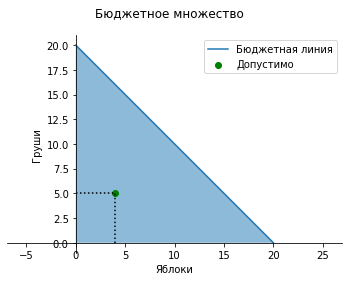

In [101]:
def plot_budget(g1, g2, budget, x1=0, x2=0):
    '''
    Построение графика бюджетного множества и расположения проверяемой точки
    '''
    
    # График будет построен по двум точкам (0, budget/g2.price) и (budget/g1.price, 0)
    x_points = [0, budget/g1.price] 
    y_points = [budget/g2.price, 0]
    

    fig, ax = plt.subplots() # Создаем фигуру
    fig.suptitle("Бюджетное множество")
    
    ax.plot(x_points, y_points, label="Бюджетная линия") # Строим прямую по двум точкам
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5) # Заливаем область под графиком с прозрачностью (alpha) 0.5
    
    point_status = budget_test(g1, g2, budget, x1, x2) # Находим статус проверяемой точки
    
    # В зависимости от статуса определяем цвет точки и надпись
    if point_status == 1:
        point_color = "green"
        point_label = "Допустимо"
    elif point_status == 0:
        point_color = "yellow"
        point_label = "На границе"
    else: 
        point_color = "red"
        point_label = "Недопустимо"
    
    ax.scatter(x1, x2, color=point_color, label=point_label) # Рисуем точку
    ax.plot([x1, x1], [0, x2], 'k:') # Добавляем вертикальную черную (k) пунктирную (:) линию к точке (x,y)
    ax.plot([0, x1], [x2, x2], 'k:') # Добавляем горизонтальную черную (k) пунктирную (:) линию к точке (x,y)
    
    # Добавляем название осей
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)

    # Сдвигаем и скрываем оси так, чтобы получились декартовы координаты
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    
    ax.axis('equal') # Принудительно делаем оси равными
    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show() # Отображаем рисунок


g1 = Good("Яблоки", 5)
g2 = Good("Груши", 5)
budget = 100   
plot_budget(g1, g2, budget, 4, 5);

## Интерактивное представление

In [102]:
# Интерактивный виджет
def interactive_plot(p1, p2, budget, x1, x2):
    g1 = Good("Яблоки", p1) # Создаем первый товар с ценой p1
    g2 = Good("Груши", p2) # Создаем второй товар с ценой p2
    plot_budget(g1, g2, budget, x1, x2);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), budget=(1,100), x1 = (1,10), x2=(1,10));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

## Работа с таблицами

В данном разделе мы будем работать с таблицами. Вначале мы загрузим данные из Excel файла в датафрейм библиотеки pandas. Затем мы обработаем строки этой таблицы, и для каждой строки проверим, выполняется ли бюджетное ограничение, и результаты сохраним в новый датафрейм. Далее мы отфильтруем получившийся датафрейм по условию, что бюджетное ограничение выполняется (в том числе на границе). Результат мы отсортируем по размеру бюджета и сохраним в новый Excel файл.

Файл model1_data.xlsx должен находиться в том же каталоге, что и данная тетрадка. Файл можно скачать по [данной ссылке](http://samonenko.ru/upload/model1_data.xlsx).

In [103]:
df = pd.read_excel("model1_data.xlsx") # Загрузим таблицу из Excel файла в датафрейм 
df # Печатаем датафрейм

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant
0,Яблоки,5,Груши,5,50,5,5
1,Яблоки,5,Груши,5,51,5,5
2,Апельсины,5,Мандарины,5,49,5,5
3,Виоград,2,Малина,3,30,23,45
4,Виоград,2,Малина,3,30,6,8
5,Виоград,2,Малина,3,45,6,8


In [106]:
result = []
for index, row in df.iterrows(): # Цикл по всем строкам df
    # Строка сохраняется в словаре row, где ключами являются имена столбцов
    
    # Для каждой строки создаем продукты
    g1 = Good(row['G1_name'], row['G1_price']) 
    g2 = Good(row['G2_name'], row['G2_price'])

    result.append(budget_test(g1, g2, row['Budget'], row['G1_quant'], row['G2_quant']))

df["Result"] = result # Создаем в df новый столбец Result и сохраняем в него список значений result
df

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,Result
0,Яблоки,5,Груши,5,50,5,5,0
1,Яблоки,5,Груши,5,51,5,5,1
2,Апельсины,5,Мандарины,5,49,5,5,-1
3,Виоград,2,Малина,3,30,23,45,-1
4,Виоград,2,Малина,3,30,6,8,-1
5,Виоград,2,Малина,3,45,6,8,1


In [107]:
df_super = df[df["Result"] >= 0] # Фильтруем датафрейм по условию, что в столбце Result значение >= 0 и сохраняем в новый датафрейм
df_super

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,Result
0,Яблоки,5,Груши,5,50,5,5,0
1,Яблоки,5,Груши,5,51,5,5,1
5,Виоград,2,Малина,3,45,6,8,1


In [108]:
df_super = df_super.sort_values(by = 'Budget') # Сортируем датафрейм по столбцу Budget и сохраняем в тот же датафрейм
df_super

,G1_name,G1_price,G2_name,G2_price,Budget,G1_quant,G2_quant,Result
5,Виоград,2,Малина,3,45,6,8,1
0,Яблоки,5,Груши,5,50,5,5,0
1,Яблоки,5,Груши,5,51,5,5,1


In [109]:
df_super.to_excel("model1_result.xlsx") # Сохраняем 

## Обратная задача

### Случай двух товаров

Решим обратную задачу, теперь мы должны узнать стоимости товаров, если известны точки, которые лежат на границе кривой бюджетных ограничений.

Пусть нам известно, что две точки $A_1 = (a_{1,1}, a_{1,2})$ и $A_2 = (a_{2,1}, a_{2,2})$ лежат на границе кривой бюджетных ограничений. В нашей модели бюджетное ограничение задается прямой вида:
$$p_1 x_1 + p_2 x_2 = b,$$ 
где $p_1$ -- цена единицы первого продукта, $p_2$ -- цена единицы второго продукта и $b$ -- общий бюджет. Без ограничения общности мы можем считать, что $b=1$, т.е. мы должны найти значения цены единиц продукта как долей от общего бюджета.

Таким образом, нам надо решить систему линейных уравнений:
$$
\begin{cases}
p_1 a_{1,1} + p_2 a_{1,2} = 1\\
p_1 a_{2,1} + p_2 a_{2,2} = 1
\end{cases}
$$

Перепишем в матричном виде:
$$
\begin{pmatrix}
    a_{1,1} & a_{1,2} \\
    a_{2,1} & a_{2,2}
\end{pmatrix}
\begin{pmatrix}
    p_1 \\
    p_2
\end{pmatrix}
= 
\begin{pmatrix}
    1 \\
    1
\end{pmatrix}
$$

Решением является: 
$$
\begin{pmatrix}
        p_1 \\
        p_2
\end{pmatrix}
=
\begin{pmatrix}
        a_{1,1} && a_{1,2} \\
        a_{2,1} && a_{2,2} 
\end{pmatrix}^{-1}
\begin{pmatrix}
    1 \\
    1
\end{pmatrix}
$$

При этом надо учесть, что $p_1 > 0$ и $p_2 > 0$, в противном случае полученное решение не соответствует изучаемой модели.

In [110]:
def get_goods_parameters(list_of_points):
    '''
        list_of_points -- двумерный массив
        list_of_points = [
            [a11, a12],
            [a21, a22],
        ]

        Функция возвращает список цен, если задача имеет решение, и None, если не имеет
    '''
    
    ones = np.ones([2,1]) # матрица 2x1 из единиц 

    # np.linalg.inv() -- поиск обратной матрицы
    # A @ B -- матричное умножение 
    if np.linalg.det(list_of_points) != 0:
        solution = np.linalg.inv(list_of_points) @ ones
    else:
        return None

    p_min = min(solution)
    if is_equal(p_min, 0) or p_min < 0:
        return None
    else:
        return solution

list_of_points = [
    [1,2],
    [2,1]
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [1,2],
    [2,2]
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [2,2],
    [2,1]
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [1,1],
    [2,2]
]
print(get_goods_parameters(list_of_points))

[[0.33333333]
 [0.33333333]]
None
None
None


### Графическое представление

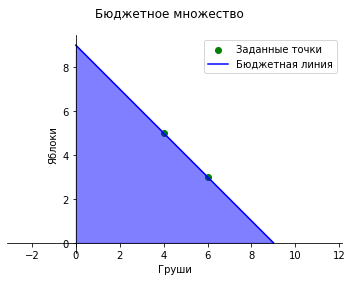

In [111]:
def plot_goods_parameters(list_of_points):

    fig, ax = plt.subplots() # Создаем фигуру

    list_of_points = np.array(list_of_points)
    x_values = list_of_points.T[0]
    y_values = list_of_points.T[1]
    ax.scatter(x_values, y_values, label="Заданные точки", color="green")
            
    ax.axis('equal') # Принудительно делаем оси равными

    result = get_goods_parameters(list_of_points)
    if not (result is None):
        fig.suptitle("Бюджетное множество")
        g1 = Good("Груши", result[0][0])
        g2 = Good("Яблоки", result[1][0])
        budget = 1
        x_points = [0, budget/g1.price] 
        y_points = [budget/g2.price, 0]
        
        ax.plot(x_points, y_points, label="Бюджетная линия", color="blue") # Строим прямую по двум точкам
        ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5, color="blue") # Заливаем область под графиком с прозрачностью (alpha) 0.5
       
         # Добавляем название осей
        ax.set_xlabel(g1.name)
        ax.set_ylabel(g2.name)

        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_visible(False)

    else:
        fig.suptitle("Модель не предусматривает решения")

    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show()



list_of_points = [
    [4,5],
    [6,3]
]
plot_goods_parameters(list_of_points)

### Интерактивное представление

In [112]:
# Интерактивный виджет
def interactive_plot(x11, x12, x21, x22):
    list_of_points = [
        [x11, x12],
        [x21, x22]
    ]
    plot_goods_parameters(list_of_points);

interact(interactive_plot, x11=(1, 10), x12 = (1, 10), x21=(1, 10), x22 = (1, 10));

interactive(children=(IntSlider(value=5, description='x11', max=10, min=1), IntSlider(value=5, description='x1…

### Случай трех товаров

Отметим, что рассуждения и код практически не поменяются, если речь пойдет о трех товарах и трех точках в трехмерном пространстве.

Пусть нам даны три точки $A_1 = (a_{1,1}, a_{1,2}, a_{1,3})$, $A_2 = (a_{2,1}, a_{2,2}, a_{2,3})$ и $A_3 = (a_{3,1}, a_{3,2}, a_{3,3})$. Надо решить систему линейных уравнений:

$$
\begin{cases}
p_1 a_{1,1} + p_2 a_{1,2} + p_3 a_{1,3}= 1\\
p_1 a_{2,1} + p_2 a_{2,2} + p_3 a_{2,3}= 1\\
p_1 a_{3,1} + p_2 a_{3,2} + p_3 a_{3,3}= 1\\
\end{cases}
$$

Перепишем в матричном виде:
$$
\begin{pmatrix}
    a_{1,1} & a_{1,2} & a_{1,3}\\
    a_{2,1} & a_{2,2} & a_{2,3}\\
    a_{3,1} & a_{3,2} & a_{3,3}\\
\end{pmatrix}
\begin{pmatrix}
        p_1 \\
        p_2 \\
        p_3
\end{pmatrix}
= 
\begin{pmatrix}
        1 \\
        1 \\
        1
\end{pmatrix}
$$

Решением является: 
$$
\begin{pmatrix}
        p_1 \\
        p_2 \\
        p_3
\end{pmatrix}
=
\begin{pmatrix}
    a_{1,1} & a_{1,2} & a_{1,3}\\
    a_{2,1} & a_{2,2} & a_{2,3}\\
    a_{3,1} & a_{3,2} & a_{3,3}\\
\end{pmatrix}^{-1}
\begin{pmatrix}
        1 \\
        1 \\
        1
\end{pmatrix}
$$

In [113]:
def get_goods_parameters(list_of_points):
    '''
        list_of_points -- двумерный массив
        list_of_points = [
            [a11, a12],
            [a21, a22],
        ]

        Функция возвращает список цен, если задача имеет решение, и None, если не имеет
    '''
    
    ones = np.ones([3,1]) # единственное изменение тут

    if np.linalg.det(list_of_points) != 0:
        solution = np.linalg.inv(list_of_points) @ ones
    else:
        return None

    p_min = min(solution)
    if is_equal(p_min, 0) or p_min < 0:
        return None
    else:
        return solution

list_of_points = [
    [0,0,1],
    [0,1,0],
    [1,0,0],
]
print(get_goods_parameters(list_of_points))

list_of_points = [
    [0,0,1],
    [0,1,1],
    [1,0,0],
]
print(get_goods_parameters(list_of_points))

[[1.]
 [1.]
 [1.]]
None


### Случай $n$ товаров. <font color="red">Задание 1.</font> <a id="task_1"></a>

Реализуйте предыдущий пример для случая $n$ товаров. Вам надо написать поясняющий текст, используя $\LaTeX$, а также реализовать саму функцию.

Пусть нам даны $n$ точек $A_1 = (a_{1,1}, a_{1,2}, \dots ,a_{1,n})$, $A_2 = (a_{2,1}, a_{2,2}, \dots, a_{2,n})$, $\dots$, $A_n = (a_{n,1}, a_{n,2}, \dots, a_{n,n})$. Надо решить систему линейных уравнений: 

<font color="red">Решение

Бюджетное ограничение в случае с n товарами задается линейной функцией, которая выражает ограничение на расходы. Предположим, что цена каждого товара равна $p_i$, а количество каждого товара, которое мы покупаем, равно $x_i$. Тогда бюджетное ограничение можно записать в виде:

$$p_1x_1 + p_2x_2 + \cdots + p_nx_n \leq B,$$

где $B$ - это бюджет, то есть максимальная сумма денег, которую мы можем потратить.

Перед тем, как перейти к матричному виду, необходимо решить систему линейных уравнений, которая будет состоять из бюджетного ограничения и ограничений на количество товаров. Эта система будет иметь вид:

$$\begin{cases} p_1x_1 + p_2x_2 + \cdots + p_nx_n \leq B, \\ x_1 \geq 0, \\ x_2 \geq 0, \\ \cdots \\ x_n \geq 0. \end{cases}$$

Для решения этой системы необходимо использовать методы линейной алгебры, например, метод Гаусса или метод обратной матрицы. После решения системы линейных уравнений, можно перейти к матричному виду, записав коэффициенты перед переменными в виде матрицы.

Для данной задачи с $n$ точками на границе кривой бюджетных ограничений, мы можем записать систему линейных уравнений в матричной форме:

$$
\begin{pmatrix}
    a_{1,1} & a_{1,2} & \dots & a_{1,n} \\
    a_{2,1} & a_{2,2} & \dots & a_{2,n} \\
    \vdots & \vdots & \ddots & \vdots \\
    a_{n,1} & a_{n,2} & \dots & a_{n,n} \\
\end{pmatrix}
\begin{pmatrix}
    p_1 \\
    p_2 \\
    \vdots \\
    p_n
\end{pmatrix}
=
\begin{pmatrix}
    1 \\
    1 \\
    \vdots \\
    1
\end{pmatrix}
$$

Мы можем решить систему линейных уравнений, чтобы найти значения цен единиц продукта как доли от общего бюджета. Для этого нам нужно найти обратную матрицу для матрицы коэффициентов перед переменными $p_1, p_2, \dots, p_n$.

$$
\begin{pmatrix}
        p_1 \\
        p_2 \\
        \vdots \\
        p_n
\end{pmatrix}
=
\begin{pmatrix}
        a_{1,1} & a_{1,2} & \dots & a_{1,n} \\
        a_{2,1} & a_{2,2} & \dots & a_{2,n} \\
        \vdots & \vdots & \ddots & \vdots \\
        a_{n,1} & a_{n,2} & \dots & a_{n,n} \\
\end{pmatrix}^{-1}
\begin{pmatrix}
    1 \\
    1 \\
    \vdots \\
    1
\end{pmatrix}
$$

Надо убедиться, что обратная матрица существует. Для этого можно проверить, что определитель матрицы коэффициентов не равен нулю. Если обратная матрица существует, то ее элементы будут положительными, так как цены не могут быть отрицательными.

Теперь представлю пример функции, которая принимает список точек на границе кривой бюджетных ограничений и находит значения цен единиц продукта:

In [161]:
import numpy as np

def get_goods_parameters(list_of_points):
    # Преобразуем список точек в матрицу
    A = np.array(list_of_points)
    
    # Проверяем, что определитель матрицы не равен нулю
    if np.linalg.det(A) == 0:
        return None
    
    # Вычисляем обратную матрицу
    A_inv = np.linalg.inv(A)
    
    # Вычисляем значения цен единиц продукта
    p = np.dot(A_inv, np.ones((len(list_of_points), 1)))
    
    # Проверяем, что значения цен единиц продукта положительны
    if np.any(p <= 0):
        return None
    
    # Возвращаем значения цен единиц продукта
    return p.flatten()

In [162]:
# Пример использования функции
list_of_points = np.eye(10) # Единичная матрица
print(get_goods_parameters(list_of_points))

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Анализ вывода функции

Первый пример выводит значения цен единиц продукта для случая, когда все точки находятся на одной прямой. В этом случае значения цен будут равны $[1, 1, \dots, 1]$. 

В данном случае, поскольку мы ищем минимальную сумму цен на товары, которые мы должны купить, чтобы удовлетворить ограничения нашего бюджета, все цены должны быть одинаковыми и равными 1. Поэтому мы получаем список цен {1, 1, ..., 1} длины n.

## Кривые безразличия

### Параметры функции полезности Кобба-Дугласа

Напишем функцию, которая будет строить графики кривых безразличия функции полезности Кобба-Дугласа вида
$$c = x^{\alpha}y^{1-\alpha}$$
при различных значениях параметров $c$ и $\alpha$.

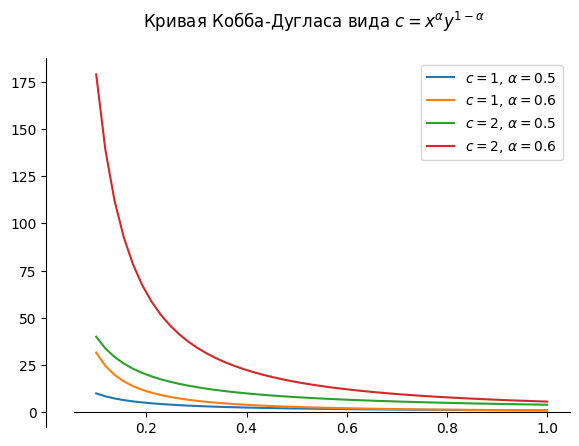

In [ ]:
def Cobb_Douglas(x, c=1, alpha=0.9):
    # Выразим в явном виде y как функцию от x
    return math.pow(x, -alpha/(1-alpha))*math.pow(c, 1/(1-alpha))

def plot_Cobb_Douglas(c_values, alpha_values):
    x_values = np.linspace(0.1, 1) # Массив из 50 точек от 0.1 до 1

    fig, ax = plt.subplots()
    fig.suptitle("Кривая Кобба-Дугласа вида $c = x^{\\alpha}y^{1-\\alpha}$") # Двойные слеши нужны, чтобы не экранировать следующий символ
    
    for c in c_values:
        for alpha in alpha_values:
            y_values = [Cobb_Douglas(x, c, alpha) for x in x_values]    
            ax.plot(x_values, y_values, label=f"$с = {c}$, $\\alpha = {alpha} $")
    

    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.legend()
    

c_values = [1, 2]
alpha_values = [0.5, 0.6]
plot_Cobb_Douglas(c_values, alpha_values)

### Поиск и визуализация оптимального решения для функции Кобба-Дугласса

Напишем функцию, которая по информации о двух товарах, бюджете и параметре $\alpha$ функции полезности Кобба-Дугласа найдет оптимальное решение, т.е. точку касания кривой безразличия функции Кобба-Дугласа и границы бюджетного ограничения.

Известно, что решение можно найти по формуле:
$$
\begin{cases}
x_1 = \frac{\alpha}{g1.price}\\
x_2 = \frac{1-\alpha}{g2.price}\\
\end{cases}
$$

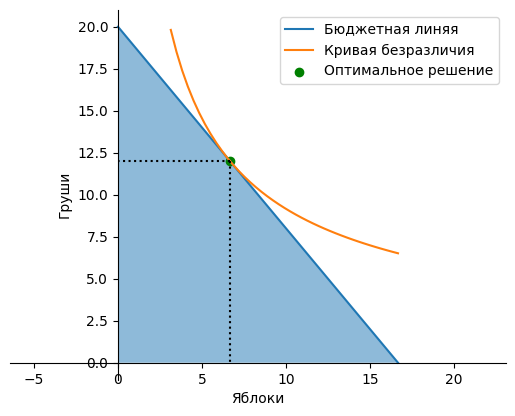

In [ ]:
def budget_Cobb_Douglas_solution(g1, g2, budget, alpha=0.5):
    '''
        При заданных ценах на товары, бюджете и параметре alpha находит оптимальное решение и
        значение выражения x^(alpha) * y^(1-alpha)
    '''
    x_solution = alpha*budget/g1.price
    y_solution = (1-alpha)*budget/g2.price
    return x_solution, y_solution, math.pow(x_solution, alpha)*math.pow(y_solution, 1-alpha)

def plot_budget_Cobb_Douglas(g1, g2, budget, alpha=0.5):
    x_solution, y_solution, c = budget_Cobb_Douglas_solution(g1, g2, budget, alpha)
    
    x_points = [0, budget/g1.price]
    y_points = [budget/g2.price, 0]
    fig, ax = plt.subplots()
    ax.plot(x_points, y_points, label="Бюджетная линия")
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5)
    
    x_values = np.linspace(0.1, budget/g1.price)
    y_values = np.array([Cobb_Douglas(x, c, alpha) for x in x_values])
    filter = y_values < budget/g2.price
    ax.plot(x_values[filter], y_values[filter], label="Кривая безразличия")
    ax.scatter(x_solution, y_solution, label="Оптимальное решение", color='green')
    ax.plot([x_solution, 0], [y_solution, y_solution], 'k:')
    ax.plot([x_solution, x_solution], [y_solution, 0], 'k:')
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    ax.axis('equal')
    ax.legend()
    plt.show()

g1 = Good("Яблоки", 6)
g2 = Good("Груши", 5)
budget = 100 
alpha = 0.4
plot_budget_Cobb_Douglas(g1, g2, budget, alpha)

### Интерактивная визуализация оптимального решения для функции Кобба-Дугласа

In [ ]:
def interactive_plot(p1, p2, budget, alpha):
    g1 = Good("Яблоки", p1)
    g2 = Good("Груши", p2)
    plot_budget_Cobb_Douglas(g1, g2, budget, alpha);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), budget=(1,100), alpha=(0.1,0.9));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

### Параметры функции полезности Леонтьева. <font color="red">Задание 2</font> <a id="task_2"></a>

Напишите код, который визуализирует графики кривых безразличия для функции Леонтьева вида 
$$
с = \min(\frac{x}{a}, \frac{y}{b})
$$
при различных значениях параметров $а$ и $b$.

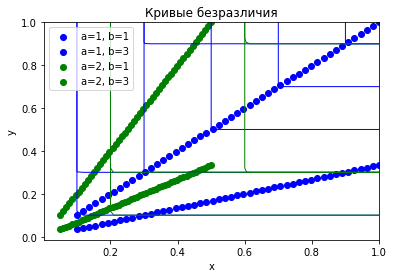

In [189]:
import numpy as np
import matplotlib.pyplot as plt

def plot_Leontev(a_values, b_values):
     
    # Создаем фигуру и оси
    fig, ax = plt.subplots()

    # Строим кривые безразличия
    colors = ['blue', 'green', 'red', 'orange', 'purple']
    for i, a in enumerate(a_values):
        for j, b in enumerate(b_values):
            x = np.linspace(0.1, 1)
            y = np.linspace(0.1, 1)
            X, Y = np.meshgrid(x, y)
            C = np.minimum(X/a, Y/b)
            ax.contour(X, Y, C, levels=[0.1, 0.3, 0.5, 0.7, 0.9], colors=colors[i], linewidths=1)
            ax.scatter(x=x/a, y=y/b, color=colors[i], label=f'a={a}, b={b}')

    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Кривые безразличия')
    plt.legend()
    plt.show()

a_values = [1, 2]
b_values = [1, 3]
plot_Leontev(a_values, b_values)

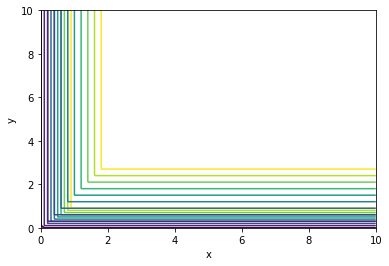

In [142]:
def plot_Leontev(a_values, b_values):
    x = np.linspace(0, 10, 100)
    y = np.linspace(0, 10, 100)
    X, Y = np.meshgrid(x, y)
    fig, ax = plt.subplots()
    for a, b in zip(a_values, b_values):
        C = np.minimum(X/a, Y/b)
        ax.contour(X, Y, C, levels=np.arange(0, 1, 0.1))
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    plt.show()

a_values = [1, 2]
b_values = [1, 3]
plot_Leontev(a_values, b_values)

### Поиск и визуализация оптимального решения для функции полезности Леонтьева. <font color="red">Задание 3</font> <a id="task_3"></a>

Для двух заданных товаров $g1$, $g2$, величины бюджета $budget$, а также параметров $a$ и $b$ функции полезности Леонтьева, найдите оптимальное решение и визуализируйте его.

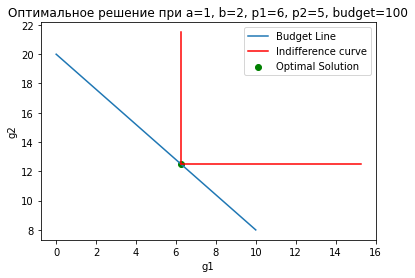

In [181]:
def plot_budget_Leontev(g1, g2, budget, a, b):
    # Создаем сетку значений x и y
    x = np.linspace(0, 10, 100)
    y = np.linspace(0, 10, 100)
    X, Y = np.meshgrid(x, y)

    # Указываем цены товаров
    p1 = g1.price
    p2 = g2.price

    # Вычисляем значение функции Леонтьева для каждой точки на сетке
    Z = np.minimum(X/a, Y/b)

    # Строим бюджетную линию
    plt.plot(x, budget/p2 - p1/p2*x, label='Budget Line')

    # Находим оптимальное решение
    x_opt = a*budget / (b * (a/b*p1 +p2))
    y_opt = budget / (a/b*p1 + p2)

    # Строим график кривых безразличия
    x_k = [x_opt for i in range(10)]
    y_k = [y_opt + i for i in range(10)]
    y_a = [y_opt for i in range(10)]
    x_a = [x_opt + i for i in range(10)]
    plt.plot(x_k, y_k, color = "red", label="Indifference curve")
    plt.plot(x_a, y_a, color = "red")

    # Отмечаем точку оптимального решения
    plt.scatter(x_opt, y_opt, color='g', label='Optimal Solution')

    plt.xlabel('g1')
    plt.ylabel('g2')
    plt.title(f'Оптимальное решение при a={a}, b={b}, p1={p1}, p2={p2}, budget={budget}')
    plt.legend()
    plt.show()

g1 = Good("Яблоки", 6)
g2 = Good("Груши", 5)
budget = 100 
a = 1
b = 2
plot_budget_Leontev(g1, g2, budget, a, b)

Интерактивная визуализация оптимального решения для функции полезности Леонтьева

In [183]:
def interactive_plot(p1, p2, budget, a, b):
    g1 = Good("Яблоки", p1)
    g2 = Good("Груши", p2)
    plot_budget_Leontev(g1, g2, budget, a, b);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), budget=(1,100), a=(1,10), b=(1,10));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

# Модель 2

## Описание класса

В данной модели у каждого товара есть три параметра: название, цена и количество такого товара, которое можно получить бесплатно.
Это означает, что потребитель всегда может получить бесплатно товар в заданном количестве, а за каждую следующую единицу товара необходимо заплатить указанную цену.

In [122]:
class Good():
    def __init__(self, name, price, free):
        self.name = name
        self.price = price
        self.free = free # Количество продукта, которое можно получить бесплатно

## Проверка бюджетного ограничения. <font color="red">Задание 4</font><a id="task_4"></a>

Напишем функцию, которая проверит, удовлетворяет ли конкретная точка бюджетным ограничениям.

In [141]:
def budget_test(g1: Good, g2: Good, budget, x1=0, x2=0):
    '''
        Проверка расположения точки (x1, x2) относительно бюджетного множества:
        Если внутри бюджетного множества, то возвращается значение 1,
        Если на границе бюджетного множества, то возвращается значение 0,
        Если вне бюджетного множества, то возвращается значение -1.
    '''
    # Рассчитываем текущее значение бюджета при заданных значениях x1 и x2
    current_budget = g1.price * (x1 - g1.free) + g2.price * (x2 - g2.free)
    
    # Сравниваем текущее значение бюджета с заданным
    if current_budget == budget:
        return 0
    elif current_budget < budget:
        return 1
    elif current_budget > budget:
        return -1
    
g1 = Good("Яблоки", 10, 1)
g2 = Good("Груши", 10, 1)
budget = 100
print(budget_test(g1, g2, budget, 5, 6))
print(budget_test(g1, g2, budget, 6, 6))
print(budget_test(g1, g2, budget, 6, 7))

1
0
-1


## Графическое представление. <font color="red">Задание 5.</font> <a id="task_5"></a>

Напишите функцию, которая будет изображать бюджетное множество и проверяемую точку.

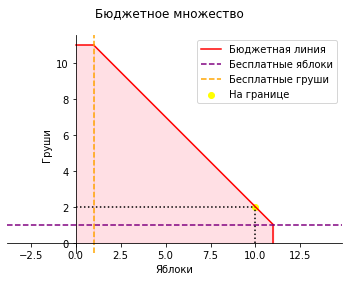

In [149]:
def plot_budget(g1: Good, g2: Good, budget, x, y):
    
    # График будет построен по двум точкам
    x_points = [g1.free, budget/g1.price + g1.free] 
    y_points = [budget/g2.price + g2.free, g2.free]
    
    
    xl_points = [0, g1.free]
    yl_points = [budget/g1.price + g2.free, budget/g2.price + g2.free]
    
    xr_points = [budget/g1.price + g1.free, budget/g2.price + g2.free]
    yr_points = [g2.free, 0]
    
    
    fig, ax = plt.subplots() # Создаем фигуру
    fig.suptitle("Бюджетное множество")
    
    ax.plot(x_points, y_points, label="Бюджетная линия", color = "red") # Строим прямую по двум точкам
    
    
    ax.plot(xl_points, yl_points, color = "red")
    ax.plot(xr_points, yr_points, color = "red")
    ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5, color = "pink") # Заливаем область под графиком с прозрачностью (alpha) 0.5
    ax.fill_between(xl_points, yl_points, np.zeros_like(x_points), alpha=0.5, color = "pink")
    
    
    # Добавляем линию "бесплатные яблоки"
    ax.axhline(g1.free, color='purple', linestyle='--', label="Бесплатные яблоки")
    # Добавляем линию "бесплатные груши"
    ax.axvline(g2.free, color='orange', linestyle='--', label="Бесплатные груши")
    
    point_status = budget_test(g1, g2, budget, x, y)
    point_status = budget_test(g1, g2, budget, x, y)
    if point_status == 1:
        point_color = "green"
        point_label = "Допустимо"
    elif point_status == 0:
        point_color = "yellow"
        point_label = "На границе"
    else: 
        point_color = "red"
        point_label = "Недопустимо"
    ax.scatter(x, y, color=point_color, label=point_label) # Рисуем точку
    ax.plot([x, x], [0, y], 'k:') 
    ax.plot([0, x], [y, y], 'k:')  
    ax.set_xlabel(g1.name)
    ax.set_ylabel(g2.name)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_visible(False)
    
    ax.axis('equal') # Принудительно делаем оси равными
    ax.legend() # Отображаем легенду (информацию о данных)
    plt.show()    
    
    
g1 = Good("Яблоки", 10, 1)
g2 = Good("Груши", 10, 1)
budget = 100
plot_budget(g1, g2, budget, 10, 2)

## Интерактивное представление

In [148]:
def interactive_plot(p1, f1, p2, f2, budget, x, y):
    g1 = Good("Яблоки", p1, f1)
    g2 = Good("Груши", p2, f2)
    plot_budget(g1, g2, budget, x, y);

interact(interactive_plot, p1=(1, 10), f1=(0, 10), p2 = (1, 10), f2=(0,10), budget=(1,100), x=(0,10), y=(0,10))

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='f1'…

<function __main__.interactive_plot(p1, f1, p2, f2, budget, x, y)>

## Работа с таблицами. <font color="red">Задание 6</font><a id="task_7"></a>

Выполните аналогичные действия, как и с моделью 1, а именно:
* Создайте файл model2_data.xlsx по аналогии с тем, как устроен файл model1_data.xlsx. И добавьте в него как минимум 10 строчек.
* Загрузите данные из таблицы model2_data.xlsx
* Для каждой записи проверьте, выполнено ли бюджетное ограничение.
* Отфильтруйте только те варианты, в которых бюджетное ограничение выполняется (в том числе и на границе).
* Отсортируйте таблицу по столбцу G1_free.
* Результат сохраните в файл model2_result.xlsx

Допускается в этом задании вместо Excel файлов использовать csv файлы.

In [216]:
df = pd.read_excel("model2_data.xlsx") 
df

result = []
for index, row in df.iterrows(): # Цикл по всем строкам df
    # Строка сохраняется в словаре row, где ключами являются имена столбцов
    
    # Для каждой строки создаем продукты
    g1 = Good(row['G1_name'], row['G1_price'], row['G1_free'] ) 
    g2 = Good(row['G2_name'], row['G2_price'], row['G2_free'])

    result.append(budget_test(g1, g2, row['Budget'], row['G1_quant'], row['G2_quant']))

df["Result"] = result 

df_super = df[df["Result"] >= 0] # Фильтруем датафрейм по условию, что в столбце Result значение >= 0 и сохраняем в новый датафрейм
df_super

df_super = df_super.sort_values(by = 'G1_free') # Сортируем датафрейм по столбцу Budget и сохраняем в тот же датафрейм
df_super

df_super.to_excel("model2_result.xlsx") #сохраняем

TypeError: __init__() takes 3 positional arguments but 4 were given

## Обратная задача. <font color="red">Задание 7</font> <a id="task_7"></a>

Пусть нам даны четыре точки $A_1 = (a_{1,1}, a_{1,2})$, $A_2 = (a_{2,1}, a_{2,2})$, $A_3 = (a_{3,1}, a_{3,2})$ и $A_4 = (a_{4,1}, a_{4,2})$. Необходимо определить, существуют ли параметры Модели 2, т.е. значения __price >0__ и __free >= 0__ для двух товаров такие, чтобы граница бюджетной линии содержала указанные точки. Если такие параметры существуют для рассматриваемой модели, то необходимо вывести параметры модели и изобразить ее бюджетное ограничение. Если таких параметров не существует, то необходимо вывести сообщение об этом.

Реализуйте графический интерактивный интерфейс, визуализирующий решение данной задачи, по аналогии с тем, как это сделано для Модели 1.

In [215]:
from operator import itemgetter
def get_goods_parameters(list_of_points):
    list_of_points = sorted(list_of_points, key=itemgetter(1), reverse=True)  # cортитруем по y по убыванию
    list_of_points = sorted(list_of_points, key=itemgetter(0))  # сортируем по x по возрастанию

    m = [1]
    for i in range(3):
        if list_of_points[i] != list_of_points[i + 1]:
            if (list_of_points[i + 1][1] - list_of_points[i][1]) > 0:  # необходимое условие
                return None
            # a - cos угла между осью  x и вектором list_of+point[i+1]list_of+point[i] значение должно не убывать
            a = (list_of_points[i + 1][0] - list_of_points[i][0]) / (((list_of_points[i + 1][0] - list_of_points[i][
                0]) ** 2 + (list_of_points[i + 1][1] - list_of_points[i][1]) ** 2) ** (1 / 2))
            if m[-1] < a: 
                return None
            else:
                m.append(a)
    v = False
    g = False
   
    l = [list_of_points[0]]
    for list in list_of_points:
        if list[0] == l[-1][0]:
            if list[1] != l[-1][1]:
                v = True
            continue
        elif list[1] == l[-1][1]:
            if list[0]!=l[-1][0]:
                g = True
            l.pop()
            l.append(list)
        else:
            l.append(list)
 
    if len(l) == 1:
        if v==True and g==True:
            return None
        elif v==False and g==False:
            return [[0, 0, l[0][0], l[0][0]], [l[0][0] + l[0][1], l[0][0] + l[0][1], l[0][1], 0]]
        elif v==True and g==False:
            return [[0, 0, l[0][0], l[0][0]], [l[0][0] + l[0][1], l[0][0] + l[0][1], l[0][1], 0]]
        else:
            return [[0, l[0][0], l[0][0] + l[0][1], l[0][0] + l[0][1]], [l[0][1], l[0][1], 0, 0]]
    if len(l) == 2:
        return [[0, l[0][0], l[1][0], l[1][0]], [l[0][1], l[0][1], l[1][1], 0]]
    if len(l) == 3:

        a = (l[0][1] - l[1][1]) * (l[1][0] - l[2][0]) / (l[1][1] - l[2][1]) + l[1][0]
        return [[0, a, l[2][0], l[2][0]], [l[0][1], l[0][1], l[2][1], 0]]
    if len(l) == 4:

        a = (l[0][1] - l[1][1]) * (l[1][0] - l[2][0]) / (l[1][1] - l[2][1]) + l[1][0]
        
        b = l[2][1] - (l[2][0] - l[3][0]) * (l[1][1] - l[2][1]) / (l[1][0] - l[2][0])
        return [[0, a, l[3][0], l[3][0]], [l[0][1], l[0][1], b, 0]]
def plot_goods_parameters(list_of_points):

    fig, ax = plt.subplots() # Создаем фигуру

    list_of_points = np.array(list_of_points)
    x_values = list_of_points[0]
    y_values = list_of_points[1]
    ax.scatter(x_values, y_values, label="точки по усл", color="green")
            
    ax.axis('equal') # Принудительно делаем оси равными
    list_of_points = [[list_of_points[0][0], list_of_points[1][0]], [list_of_points[0][1], list_of_points[1][1]], [list_of_points[0][2], list_of_points[1][2]], [list_of_points[0][3], list_of_points[1][3]]]
    result = get_goods_parameters(list_of_points)
    if not (result is None):
        x_points = result[0]
        y_points = result[1]
        
        ax.plot(x_points, y_points, label="Бюджетная линия", color="blue") # Строим прямую по двум точкам
        ax.fill_between(x_points, y_points, np.zeros_like(x_points), alpha=0.5, color="blue") # Заливаем область под графиком с прозрачностью (alpha) 0.5
        price1 = 50/(x_points[2]-x_points[1])
        free1 = x_points[1]
        price2 = 50/(y_points[1]-y_points[2])
        free2 = y_points[2]
        fig.suptitle(f" Бюджетное множество при $price1 = {price1}$, $free1 = {free1} $, $price2 = {price2} $,$free2 = {free2} $, $budget = 50 $ ")

        ax.set_xlabel("Груши")
        ax.set_ylabel("Яблоки")

        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_position('zero')
        ax.spines['top'].set_visible(False)

    else:
        fig.suptitle("нет решения")

    ax.legend()
    plt.show()
    
    
def interactive_plot(x1, y1, x2, y2, x3, y3, x4, y4):
    list_of_points = [[x1, x2, x3, x4],[y1, y2, y3, y4]]
    plot_goods_parameters(list_of_points);
interact(interactive_plot, x1=(1, 20), y1 = (1, 20), x2=(1, 20), y2 = (1, 20), x3=(1, 20), y3 = (1, 20), x4=(1, 20), y4 = (1, 20));

interactive(children=(IntSlider(value=10, description='x1', max=20, min=1), IntSlider(value=10, description='y…

## Кривые безразличия. <font color="red">Задание 8</font> <a id="task_8"></a>

Для двух товаров из Модели 2 и кривой безразличия функции Кобба-Дугласа найдите оптимальное решение и визуализируйте его при помощи интерактивного виджета.

Пример работы расположен по [данной ссылке](https://samonenko-econom-practice-example-streamlit-app-yyqr46.streamlit.app/)

In [ ]:
def plot_budget_Cobb_Douglas(g1: Good, g2: Good, budget, alpha=0.5):
    # Тут Ваш код
    pass

In [ ]:
def interactive_plot(p1, p2, f1, f2, budget, alpha):
    g1 = Good("Яблоки", p1, f1)
    g2 = Good("Груши", p2, f2)
    plot_budget_Cobb_Douglas(g1, g2, budget, alpha);

interact(interactive_plot, p1=(1, 10), p2 = (1, 10), f1 = (0,10), f2=(0,10), budget=(1,100), alpha=(0.1,0.9));

interactive(children=(IntSlider(value=5, description='p1', max=10, min=1), IntSlider(value=5, description='p2'…

# Модель 3

## Описание класса. <font color="red">Задание 9</font> <a id="task_9"></a>

В данной модели у каждого товара есть следующие параметры: определено некоторое пороговое значение threshold, а также две цены - $price_1$ и $price_2$. Если количество купленного товара меньше и равна $threshold$, то каждая его единица стоит $price_1$. А каждая единица товара свыше $threshold$ стоит $price_2$.

Например, если $threshold = 3$, $price_1 = 10$ и $price_2 = 5$, то:
* 2 единицы товара стоят 20,
* 3 единицы товара стоят 30,
* 4 единицы товара стоят 35,
* 5 единиц товара стоят 40.

Создайте класс Good для товаров данной модели. Реализуйте в классе метод price(quantity), который будет находить стоимость x товаров данного вида. Реализуйте в классе метод quantity(budget), который будет находить какое количество данного товара можно приобрести за стоимость budget.

In [89]:
class Good:
    def __init__(self, name, threshold, price1, price2):
        self.name = name
        self.threshold = threshold
        self.price1 = price1
        self.price2 = price2
    
    def price(self, quantity):
        if quantity <= self.threshold:
            return quantity * self.price1
        else:
            return self.threshold * self.price1 + (quantity - self.threshold) * self.price2
    
    def quantity(self, budget):
        if budget < self.price1:
            return 0
        elif budget <= self.threshold * self.price1:
            return budget // self.price1
        else:
            return self.threshold + (budget - self.threshold * self.price1) // self.price2

Пояснение к классу и реализованным методам:

Метод 'price' проверяет, сколько товара было заказано и рассчитывает стоимость в зависимости от этого. Если заказано не более threshold единиц, то стоимость будет равна quantity $\times$ price1. Если же заказано больше, то стоимость первых threshold единиц будет равна threshold $\times$ price1, а за каждую единицу сверх этого будет взиматься price2.

\begin{align*}
\text{стоимость} = \begin{cases}
\text{quantity} \times \text{price1}, & \text{если quantity} \leq \text{threshold}\\
\text{threshold} \times \text{price1} + (\text{quantity} - \text{threshold}) \times \text{price2}, & \text{если quantity} > \text{threshold}
\end{cases}
\end{align*}

В методе 'quantity' мы рассчитываем, сколько товара можно купить за заданный бюджет.

Если бюджет меньше стоимости одной единицы товара (budget < price1), то можно купить 0 единиц. 

Если бюджет меньше стоимости threshold единиц товара (budget < threshold * price1), то можно купить только целое число единиц.

Если же бюджет больше или равен стоимости threshold единиц товара, то можно купить все threshold единиц за threshold * price1 и еще столько единиц, сколько хватит бюджета на цену каждой из них

Общее количество товара, которое можно купить, равно threshold плюс это количество.

## Бюджетное ограничение. <font color="red">Задание 10</font> <a id="task_10"></a>

Напишем функцию, которая проверит удовлетворяет ли конкретная точка бюджетным ограничениям.

In [90]:
def budget_test(g1: Good, g2: Good, budget, x1=0, x2=0):
    '''
        Проверка расположения точки (x1, x2) относительно бюджетного множества:
        Если внутри бюджетного множества, то возвращается значение 1,
        Если на границе бюджетного множества, то возвращается значение 0,
        Если вне бюджетного множества, то возвращается значение -1.
    '''
    
    if x1 < 0 or x2 < 0:
        return -1
    q1 = g1.quantity(budget - g2.price(x2))
    if q1 < x1:
        return -1
    q2 = g2.quantity(budget - g1.price(q1))
    if q2 < x2:
        return -1
    if q1 == x1 and q2 == x2:
        return 0
    else:
        return 1

g1 = Good("Яблоки", 5, 10, 3)
g2 = Good("Груши", 3, 8, 3)
budget = 86
print(budget_test(g1, g2, budget, 5, 6))
print(budget_test(g1, g2, budget, 6, 6))
print(budget_test(g1, g2, budget, 6, 7))

1
0
-1


#### Пояснение:
сначала проверяется, что координаты точки неотрицательны. Затем вычисляется количество товара g1, которое можно купить за оставшийся бюджет, если купить количество товара g2, указанное в x2.

Если количество товара g1 меньше, чем указанное в x1, то точка не входит в бюджетное множество и функция возвращает -1.

Если количество товара g1 достаточно для покупки x1 единиц товара, то вычисляется количество товара g2, которое можно купить за оставшийся бюджет.

Если количество товара g2 меньше, чем указанное в x2, то точка не входит в бюджетное множество и функция возвращает -1.

Если количество товара g2 достаточно для покупки x2 единиц товара, то функция возвращает 0, если x1 и x2 соответствуют вычисленным количествам товаров, иначе функция возвращает 1.

## Графическое и интерактивное представление. <font color="red">Задание 11.</font> <a id="task_11"></a>

Напишите функцию, которая будет визуализировать бюджетное множество и проверяемую точку, а также по аналогии с предыдущими примерами реализуйте интерактивное представление.

## Обратная задача. <font color="red">Задание 12</font> <a id="task_12"></a>

Пусть нам даны четыре точки $A_1 = (a_{1,1}, a_{1,2})$, $A_2 = (a_{2,1}, a_{2,2})$, $A_3 = (a_{3,1}, a_{3,2})$ и $A_4 = (a_{4,1}, a_{4,2})$. Необходимо определить, существуют ли параметры Модели 3, т.е. значения __threshold > 0__, __price_1 > 0__ и __price_2 > 0__ для двух товаров такие, чтобы граница бюджетной линии содержала указанные точки. Если такие параметры существуют для рассматриваемой модели, то необходимо вывести параметры модели и изобразить ее бюджетное ограничение. Если таких параметров не существует, то необходимо вывести сообщение об этом.

Реализуйте графический интерактивный интерфейс, визуализирующий решение данной задачи по аналогии с тем, как это сделано для Модели 1.

In [197]:
# Тут Ваш код
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from ipywidgets import widgets, interact

def plot_budget_line(A1, A2, A3, A4):
    # Определяем координаты точек
    points = np.array([A1, A2, A3, A4])
    x = points[:, 0]
    y = points[:, 1]
    
    # Определяем границу бюджетной линии
    c = np.array([-1, -1])
    A_ub = np.vstack((points, -np.eye(2)))
    b_ub = np.hstack((-np.ones(4), np.zeros(2)))
    res = linprog(c, A_ub=A_ub, b_ub=b_ub)
    
    # Проверяем наличие решения
    if res.success:
        threshold = res.x[0]
        price_1 = res.x[1]
        price_2 = res.x[1]
        budget = -res.fun
        print(f"Параметры модели: threshold={threshold}, price_1={price_1}, price_2={price_2}")
        print(f"Бюджетное ограничение: {budget}")
        
        # Строим график
        x_budget = np.linspace(0, budget/price_1, 100)
        y_budget = threshold + (budget - x_budget*price_1)/price_2
        plt.plot(x_budget, y_budget, label="Бюджетная линия")
        plt.xlim(0, np.max(x)*1.1)
        plt.ylim(0, np.max(y)*1.1)
        plt.scatter(x, y, label="Точки")
        plt.legend()
        plt.show()
    else:
        print("Решения не существует")

In [196]:
# Создаем виджеты для ввода координат точек
A1_x = widgets.FloatSlider(min=0, max=10, step=0.1, value=1)
A1_y = widgets.FloatSlider(min=0, max=10, step=0.1, value=1)
A2_x = widgets.FloatSlider(min=0, max=10, step=0.1, value=2)
A2_y = widgets.FloatSlider(min=0, max=10, step=0.1, value=2)
A3_x = widgets.FloatSlider(min=0, max=10, step=0.1, value=3)
A3_y = widgets.FloatSlider(min=0, max=10, step=0.1, value=3)
A4_x = widgets.FloatSlider(min=0, max=10, step=0.1, value=4)
A4_y = widgets.FloatSlider(min=0, max=10, step=0.1, value=4)

# Создаем кнопку для вызова функции
button = widgets.Button(description="Построить график")

# Определяем функцию для обработки нажатия на кнопку
def on_button_click(b):
    A1 = [A1_x.value, A1_y.value]
    A2 = [A2_x.value, A2_y.value]
    A3 = [A3_x.value, A3_y.value]
    A4 = [A4_x.value, A4_y.value]
    plot_budget_line(A1, A2, A3, A4)

# Привязываем функцию к кнопке
button.on_click(on_button_click)

# Отображаем виджеты
display(A1_x, A1_y, A2_x, A2_y, A3_x, A3_y, A4_x, A4_y, button)

FloatSlider(value=1.0, max=10.0)

FloatSlider(value=1.0, max=10.0)

FloatSlider(value=2.0, max=10.0)

FloatSlider(value=2.0, max=10.0)

FloatSlider(value=3.0, max=10.0)

FloatSlider(value=3.0, max=10.0)

FloatSlider(value=4.0, max=10.0)

FloatSlider(value=4.0, max=10.0)

Button(description='Построить график', style=ButtonStyle())

## Кривые безразличия. <font color="red">Задание 13</font> <a id="task_13"></a>

### 1
Для двух товаров из Модели 3 и кривой безразличия функции полезности Кобба-Дугласа найдите оптимальное решение и визуализируйте его при помощи интерактивного виджета.

### 2 
Опишите, чем качественно ситуация с Моделью 3 отличается от ситуации с Моделями 1 и 2. Приведите примеры параметров Модели 3, которые демонстрируют данные различия.

### 13.2
Модель 3 отличается от Моделей 1 и 2 тем, что в ней цена на товар зависит от количества товара, которое потребитель покупает. Если количество товара меньше порогового значения, то цена на него будет одна, а если больше - то другая. Это позволяет более точно отразить реальную ситуацию на рынке, где цены на товары могут меняться в зависимости от объема спроса.

Примеры параметров Модели 3:

- Товар "Молоко" стоит 50 рублей за литр, если покупается до 5 литров, и 40 рублей за литр, если покупается больше 5 литров.
- Товар "Бензин" стоит 45 рублей за литр, если покупается до 30 литров, и 40 рублей за литр, если покупается больше 30 литров.
- Товар "Кофе" стоит 200 рублей за килограмм, если покупается до 2 килограммов, и 180 рублей за килограмм, если покупается больше 2 килограммов.

Таким образом, Модель 3 позволяет оптимизировать цену на товар в зависимости от его количества, что может быть особенно полезно для регулярирования цен в бизнесе, где люди работают с большими объемами продаж.

Также можно заметить, что в отличие от моделей 1 и 2, где и графически, и аналитически, мы получали единственное решение, в 3 модели можно получить несколько решений

### 13.1

Для решения задачи нам нужно составить функцию полезности, которая учитывает два товара и их цены:

$$U(x,y) = x^ay^b$$

где $x$ и $y$ - количество купленных единиц товара 1 и товара 2, $a$ и $b$ - параметры, определяющие степень влияния каждого товара на полезность.

Также нам нужно определить функцию стоимости, которая будет учитывать пороговое значение и цены на товары:

$$C(x,y) = \begin{cases} x \cdot price_1, & x \leq threshold \\ threshold \cdot price_1 + (x - threshold) \cdot price_2, & x > threshold \end{cases} + \begin{cases} y \cdot price_1, & y \leq threshold \\ threshold \cdot price_1 + (y - threshold) \cdot price_2, & y > threshold \end{cases}$$

Теперь мы можем определить функцию, которая будет находить оптимальное решение для заданных параметров:

In [159]:
def U(x, y):
    return x**a * y**b

from scipy.optimize import minimize
def find_optimal_solution(threshold, price_1, price_2, a, b):
    # Определяем функции полезности и стоимости
    
    def C(x, y):
        if x <= threshold:
            c_x = x * price_1
        else:
            c_x = threshold * price_1 + (x - threshold) * price_2
            
        if y <= threshold:
            c_y = y * price_1
        else:
            c_y = threshold * price_1 + (y - threshold) * price_2
            
        return c_x + c_y
    
    # Определяем ограничения на количество товаров
    constraints = [{'type': 'ineq', 'fun': lambda x: x[0]}, # x >= 0
                   {'type': 'ineq', 'fun': lambda x: x[1]}, # y >= 0
                   {'type': 'ineq', 'fun': lambda x: threshold - x[0]}, # x <= threshold
                   {'type': 'ineq', 'fun': lambda x: threshold - x[1]}] # y <= threshold
    
    # Находим оптимальное решение
    result = minimize(lambda x: -U(x[0], x[1]), [0.5, 0.5], constraints=constraints)
    
    # Возвращаем результаты
    return result, U(result.x[0], result.x[1]), C(result.x[0], result.x[1])

#Теперь мы можем использовать функцию interact для визуализации оптимального решения при изменении параметров:

from ipywidgets import interact

@interact(threshold=(1, 10), price_1=(1, 10), price_2=(1, 10), a=(0.1, 2), b=(0.1, 2))
def visualize_optimal_solution(threshold=5, price_1=2, price_2=5, a=1, b=1):
    # Находим оптимальное решение
    result, U_opt, C_opt = find_optimal_solution(threshold, price_1, price_2, a, b)
    
    # Выводим результаты
    print(f"Оптимальное решение: x = {result.x[0]:.2f}, y = {result.x[1]:.2f}")
    print(f"Значение функции полезности: {U_opt:.2f}")
    print(f"Значение функции стоимости: {C_opt:.2f}")
    
    # Строим график кривой безразличия и оптимального решения
    x_values = np.linspace(0.1, 10)
    y_values = np.linspace(0.1, 10)
    X, Y = np.meshgrid(x_values, y_values)
    Z = U(X, Y)
    
    fig, ax = plt.subplots()
    fig.suptitle("Кривая безразличия и оптимальное решение")
    
    ax.contour(X, Y, Z, levels=10)
    ax.plot(result.x[0], result.x[1], 'ro')
    
    ax.set_xlabel("Количество товара 1")
    ax.set_ylabel("Количество товара 2")
    
    plt.show()

interactive(children=(IntSlider(value=5, description='threshold', max=10, min=1), IntSlider(value=2, descripti…